In [6]:
import pandas as pd

#dataset link : https://www.kaggle.com/datasets/rishidamarla/cancer-patients-data

# Load the dataset
file_path = '/content/cancer patient data sets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Display information about the dataset
print(df.info())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

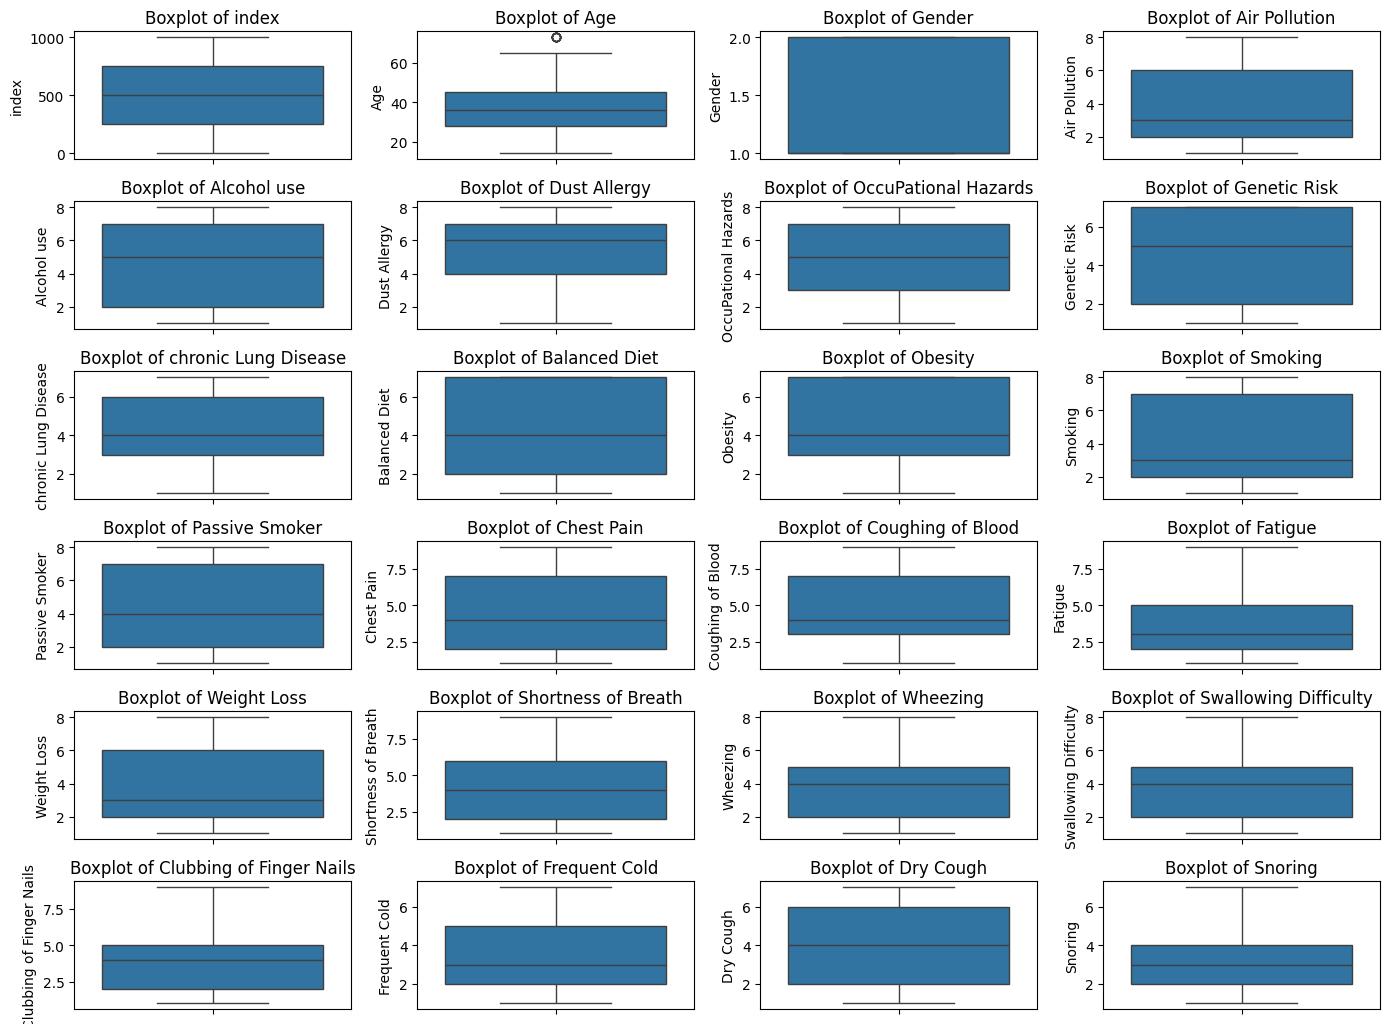

In [7]:
# Let's correct the code to avoid plotting more subplots than available features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cancer patient data sets.csv'
df = pd.read_csv(file_path)

# Select numerical features for outlier detection
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical features to detect outliers
plt.figure(figsize=(14, 12))
num_features = len(numerical_features)
for i, feature in enumerate(numerical_features):
    plt.subplot((num_features // 4) + 1, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [9]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Drop non-numeric columns
df_cleaned = df.drop(columns=non_numeric_columns)

# Display the first few rows of the cleaned dataset
print(df_cleaned.head())


Non-numeric columns: Index(['Patient Id'], dtype='object')
   index  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0   33       1              2            4             5   
1      1   17       1              3            1             5   
2      2   35       1              4            5             6   
3      3   37       1              7            7             7   
4      4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df_cleaned.dropna(inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['Level'] = label_encoder.fit_transform(df_cleaned['Level'])

# Split features and target
X = df_cleaned.drop(columns=['Level'])
y = df_cleaned['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first few rows to verify
print(X_train[:5])
print(y_train[:5])


[[-1.61897442 -0.76106299  1.26722657 -1.40072639  0.57650671  0.95571931
   0.11008029 -0.72321282 -1.24521517  0.7362452  -1.15240706 -0.37188277
  -0.49997736 -1.0537369  -1.16960182 -0.35268247 -0.36994787  1.20890297
   1.6368661   0.14955877  1.73714076  1.89674735  1.53255725  1.37188039]
 [ 0.12989037  1.3169247  -0.78912487  1.09499992  1.34262858  0.95571931
   1.05700756  0.70300802  1.45005576  1.20631396 -0.67571334  1.63829438
   1.25818478  2.01966238  0.48427614  0.54159955 -0.82667364  0.33010026
  -0.83761024 -0.30364963 -0.80037465 -1.35481954  1.53255725  2.04313684]
 [ 0.68289109 -0.76106299  1.26722657 -1.40072639  0.57650671  0.95571931
   0.11008029 -0.72321282 -1.24521517  0.7362452  -1.15240706 -0.37188277
  -0.49997736 -1.0537369  -1.16960182 -0.35268247 -0.36994787  1.20890297
   1.6368661   0.14955877  1.73714076  1.89674735  1.53255725  1.37188039]
 [ 0.20592796  2.06500027 -0.78912487  1.09499992  1.34262858  0.95571931
   1.05700756  1.17841497  0.911001

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert target to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train_cat, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Make predictions
y_pred_dl = dl_model.predict(X_test)
y_pred_dl_classes = y_pred_dl.argmax(axis=1)

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred_dl_classes)
print(f"Deep Learning Accuracy: {accuracy_dl}")
print("Deep Learning Classification Report:")
print(classification_report(y_test, y_pred_dl_classes))


Epoch 1/50
20/20 [==============================] - 2s 21ms/step - loss: 0.7945 - accuracy: 0.7234 - val_loss: 0.4396 - val_accuracy: 0.9187
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.9250 - val_loss: 0.2300 - val_accuracy: 0.9563
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2024 - accuracy: 0.9531 - val_loss: 0.1306 - val_accuracy: 0.9625
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.9734 - val_loss: 0.0825 - val_accuracy: 0.9875
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9844 - val_loss: 0.0573 - val_accuracy: 0.9937
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9969 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 8/50
20/20 [=

In [13]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Deep Learning Accuracy: {accuracy_dl}")

Random Forest Accuracy: 1.0
Deep Learning Accuracy: 1.0


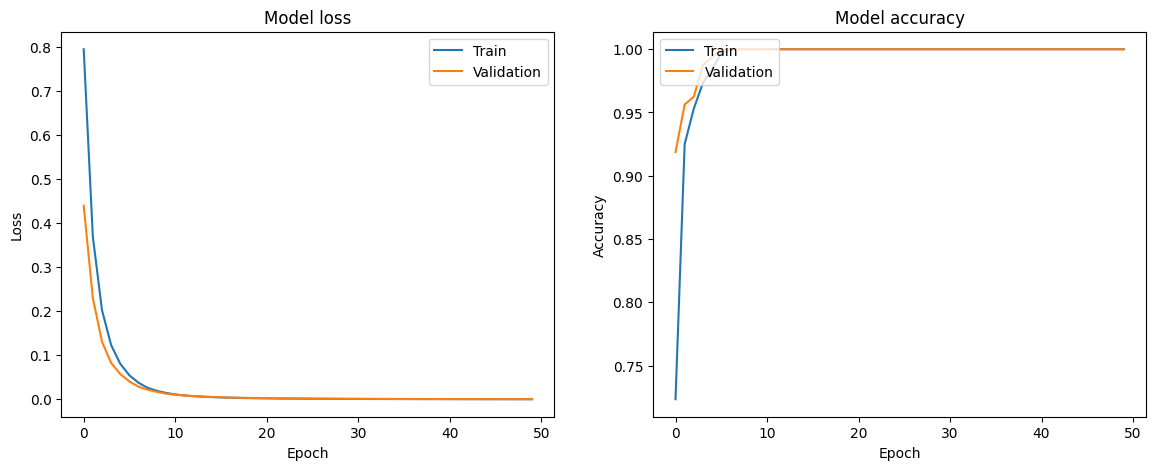

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
